# The Carpentries
## Programmatic assessment

This Jupyter notebook explores data related to the workshops we run and the instructors who teach.

In [1]:
## This code toggles all code cells displaying on or off, so we can see output and markdown cells only.
## All code cells display can be toggled on/off.

from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline 

## Preview the data set for all workshops
Here is a preview of all workshops the Carpentries has ever run.  The `administrator_name` column contains inconsistent data - do not use.


In [3]:
workshops = pd.read_csv("workshops.csv")
workshops

,slug,tag_name,month,year,day,attendance,host_name,administrator_name,country
0,2011-11-07-toronto,SWC,11,2011,7,22.0,University of Toronto,Compute Canada,CA
1,2012-01-18-stsci,SWC,1,2012,18,14.0,Space Telescope Science Institute,Software Carpentry,US
2,2012-02-20-itcp,SWC,2,2012,20,50.0,International Centre for Theoretical Physics,Cyfronet,IT
3,2012-02-23-toronto,SWC,2,2012,23,28.0,University of Toronto,Compute Canada,CA
4,2012-03-07-indiana,SWC,3,2012,7,39.0,Indiana University,Software Carpentry,US
5,2012-03-26-mbari,SWC,3,2012,26,38.0,Monterey Bay Aquarium Research Institute,Software Carpentry,US
6,2012-03-28-nersc,SWC,3,2012,28,35.0,NERSC,Software Carpentry,US
7,2012-04-02-chicago,SWC,4,2012,2,35.0,University of Chicago,Software Carpentry,US
8,2012-04-14-utahstate,SWC,4,2012,14,32.0,Utah State University,Software Carpentry,US
9,2012-04-30-ucl,SWC,4,2012,30,44.0,University College London,SSI Software Sustainability Institute,GB


In [4]:
# Clean up the tag names

workshops.loc[workshops['tag_name'].str.contains("SWC"), "tag"] = "SWC"
workshops.loc[workshops['tag_name'].str.contains("DC"), "tag"] = "DC"
workshops.loc[workshops['tag_name'].str.contains("LC"), "tag"] = "LC"
workshops.loc[workshops['tag_name'].str.contains("TTT"), "tag"] = "TTT"

workshops

,slug,tag_name,month,year,day,attendance,host_name,administrator_name,country,tag
0,2011-11-07-toronto,SWC,11,2011,7,22.0,University of Toronto,Compute Canada,CA,SWC
1,2012-01-18-stsci,SWC,1,2012,18,14.0,Space Telescope Science Institute,Software Carpentry,US,SWC
2,2012-02-20-itcp,SWC,2,2012,20,50.0,International Centre for Theoretical Physics,Cyfronet,IT,SWC
3,2012-02-23-toronto,SWC,2,2012,23,28.0,University of Toronto,Compute Canada,CA,SWC
4,2012-03-07-indiana,SWC,3,2012,7,39.0,Indiana University,Software Carpentry,US,SWC
5,2012-03-26-mbari,SWC,3,2012,26,38.0,Monterey Bay Aquarium Research Institute,Software Carpentry,US,SWC
6,2012-03-28-nersc,SWC,3,2012,28,35.0,NERSC,Software Carpentry,US,SWC
7,2012-04-02-chicago,SWC,4,2012,2,35.0,University of Chicago,Software Carpentry,US,SWC
8,2012-04-14-utahstate,SWC,4,2012,14,32.0,Utah State University,Software Carpentry,US,SWC
9,2012-04-30-ucl,SWC,4,2012,30,44.0,University College London,SSI Software Sustainability Institute,GB,SWC


## Part 1: Workshop data by country

### Workshops missing country data. 

In [5]:
# Workshops missing country data

workshops[pd.isnull(workshops['country'])]

,slug,tag_name,month,year,day,attendance,host_name,administrator_name,country,tag
820,2016-08-01-ttt-oklahoma,TTT,8,2016,1,NaN,University of Oklahoma,Software Carpentry,NaN,TTT
842,2016-08-22-unam,SWC,8,2016,22,23.0,University of Namibia,self-organized,NaN,SWC
1227,2017-08-18-Windhoek,SWC,8,2017,18,15.0,University of Namibia,self-organized,NaN,SWC
1252,2017-09-14-padova,SWC,9,2017,14,NaN,University of Padova,self-organized,NaN,SWC
1435,2018-02-22-roche,SWC,2,2018,22,NaN,University of Arizona,self-organized,NaN,SWC
1441,2018-02-26-ttt-csiro,TTT,2,2018,26,1.0,Software Carpentry,Software Carpentry,NaN,TTT
1478,2018-03-19-zarnet,SWC,3,2018,19,NaN,Zimbabwe Academic and Research Network (ZARnet),Software Carpentry,NaN,SWC
1483,2018-03-22-csumb,SWC,3,2018,22,NaN,California State University Monterey Bay,Software Carpentry,NaN,SWC
1534,2018-05-04-scsu,SWC,5,2018,4,NaN,Southern Connecticut State Universtiy,Software Carpentry,NaN,SWC
1539,2018-05-09-ttt-monsanto,TTT,5,2018,9,NaN,Monsanto,Software Carpentry,NaN,TTT


### All countries we have ever held workshops in, with a lifetime count of workshops

In [6]:
# All countries we have ever done work in
countries = workshops['slug'].groupby([workshops['country']])
# countries is a SeriesGroupBy object
lifetime_countries = countries.count()
lifetime_countries = lifetime_countries.to_frame().reset_index()
lifetime_countries

,country,slug
0,AU,154
1,BE,3
2,BR,16
3,BW,1
4,CA,157
5,CH,15
6,CN,1
7,CO,1
8,CY,1
9,DE,28


### Filter the whole dataframe to include lifetime non-TTT workshops through 2018 Q1 only.

In [7]:
# Limit to non TTT workshops

workshops_nonTTT = workshops[workshops['tag'] != "TTT"]


# Limit df to workshops through 2018Q1 only

# Get all workshops through 2017
workshops_through_2017 = workshops_nonTTT[workshops_nonTTT['year'] <= 2017]

# Get all workshops for 2018 Q1
workshops_2018Q1 = workshops_nonTTT[(workshops_nonTTT['year'] == 2018) & (workshops_nonTTT['month'] <= 3)]

# Combine the above two data frames
workshops_through_2018Q1 = pd.concat([workshops_through_2017, workshops_2018Q1])
workshops_through_2018Q1 # this will be the df used for the rest of the analysis.

# This will be used later
workshops_2017Q1 = workshops_nonTTT[(workshops_nonTTT['year'] == 2017) & (workshops_nonTTT['month'] <= 3)]


workshops_through_2018Q1

,slug,tag_name,month,year,day,attendance,host_name,administrator_name,country,tag
0,2011-11-07-toronto,SWC,11,2011,7,22.0,University of Toronto,Compute Canada,CA,SWC
1,2012-01-18-stsci,SWC,1,2012,18,14.0,Space Telescope Science Institute,Software Carpentry,US,SWC
2,2012-02-20-itcp,SWC,2,2012,20,50.0,International Centre for Theoretical Physics,Cyfronet,IT,SWC
3,2012-02-23-toronto,SWC,2,2012,23,28.0,University of Toronto,Compute Canada,CA,SWC
4,2012-03-07-indiana,SWC,3,2012,7,39.0,Indiana University,Software Carpentry,US,SWC
5,2012-03-26-mbari,SWC,3,2012,26,38.0,Monterey Bay Aquarium Research Institute,Software Carpentry,US,SWC
6,2012-03-28-nersc,SWC,3,2012,28,35.0,NERSC,Software Carpentry,US,SWC
7,2012-04-02-chicago,SWC,4,2012,2,35.0,University of Chicago,Software Carpentry,US,SWC
8,2012-04-14-utahstate,SWC,4,2012,14,32.0,Utah State University,Software Carpentry,US,SWC
9,2012-04-30-ucl,SWC,4,2012,30,44.0,University College London,SSI Software Sustainability Institute,GB,SWC


### All workshops by year and country through 2018 Q1

Will need to use [pycountry](https://pypi.org/project/pycountry/) to translate two character codes into country names.

In [8]:
workshops_by_country_year = workshops_through_2018Q1.groupby(['country', 'year'])['slug'].count().unstack()
workshops_by_country_year = workshops_by_country_year.fillna(0)
workshops_by_country_year.rename(columns={2018: '2018Q1'}, inplace=True)
workshops_by_country_year
workshops_by_country_year['total'] = workshops_by_country_year.sum(axis=1)
workshops_by_country_year

year,2011,2012,2013,2014,2015,2016,2017,2018Q1,total
country,,,,,,,,,
AU,0.0,0.0,6.0,10.0,32.0,43.0,41.0,6.0,138.0
BE,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0
BR,0.0,0.0,0.0,6.0,5.0,5.0,0.0,0.0,16.0
BW,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
CA,1.0,8.0,11.0,26.0,26.0,42.0,29.0,4.0,147.0
CH,0.0,0.0,0.0,2.0,4.0,5.0,2.0,1.0,14.0
CN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
CO,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
CY,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


### All workshops by country in 2017 (full year)

year,2017
country,
AU,41.0
BE,1.0
BW,1.0
CA,29.0
CH,2.0
DE,9.0
DK,3.0
ES,2.0
ET,4.0


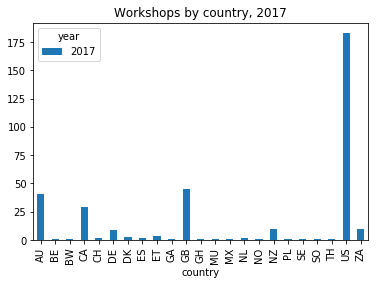

In [9]:
workshops_by_country_year_2017 = workshops_by_country_year[[2017]]
workshops_by_country_year_2017 = workshops_by_country_year_2017[(workshops_by_country_year_2017[2017] != 0)]
workshops_by_country_year_2017.plot.bar(title="Workshops by country, 2017")
workshops_by_country_year_2017

### All workshops by country 2018 Q1

year,2018Q1
country,
AU,6
CA,4
CH,1
DE,2
DK,1
ET,4
FR,1
GB,11
IE,1


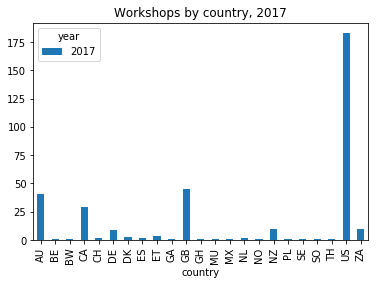

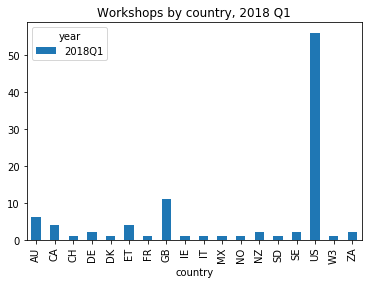

In [10]:
workshops_by_country_year_2018Q1 = workshops_2018Q1.groupby(['country', 'year'])['slug'].count().unstack()
workshops_by_country_year_2018Q1.rename(columns={2018:'2018Q1'}, inplace=True)
workshops_by_country_year_2017.plot.bar(title="Workshops by country, 2017")
workshops_by_country_year_2018Q1.plot.bar(title="Workshops by country, 2018 Q1")
workshops_by_country_year_2018Q1





### All workshops by country 2017 Q1

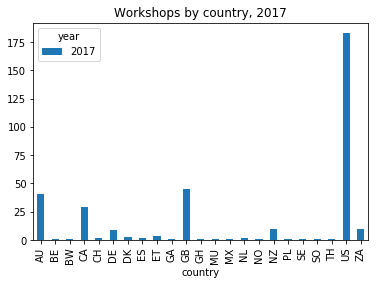

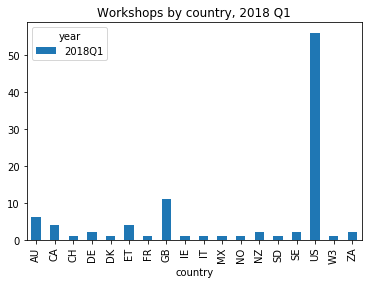

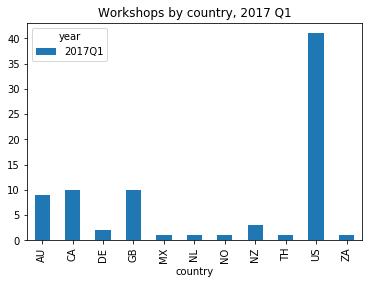

In [11]:

# 2017 Q1 workshops by country
workshops_by_country_year_2017Q1 = workshops_2017Q1.groupby(['country', 'year'])['slug'].count().unstack()
workshops_by_country_year_2017Q1.rename(columns={2017:'2017Q1'}, inplace=True)

# 2018 Q1 workshops by country
workshops_by_country_year_2018Q1 = workshops_2018Q1.groupby(['country', 'year'])['slug'].count().unstack()
workshops_by_country_year_2018Q1.rename(columns={2018:'2018Q1'}, inplace=True)

# Concatenated table, 2017 Q1 and 2018 Q1 workshops by country
workshops_by_country_year_1718Q1 = pd.concat([workshops_by_country_year_2017Q1, workshops_by_country_year_2018Q1], axis=1)

workshops_by_country_year_2017.plot.bar(title="Workshops by country, 2017")
workshops_by_country_year_2018Q1.plot.bar(title="Workshops by country, 2018 Q1")
workshops_by_country_year_2017Q1.plot.bar(title="Workshops by country, 2017 Q1")


### Side by side view of 2017 Q1 and 2018 Q1 workshops

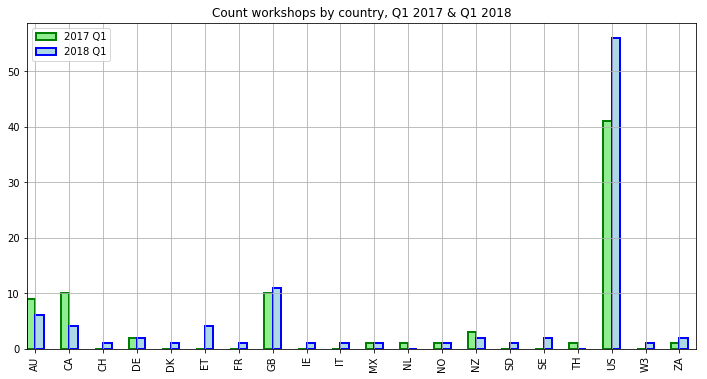

In [14]:
# plt.rcParams["patch.force_edgecolor"] = False

fig = plt.figure(figsize=(12, 6)) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
width = 0.25

workshops_by_country_year_1718Q1['2017Q1'].plot(kind='bar', color='lightgreen', ax=ax, width=width, position=1, edgecolor = 'green',  linewidth = 2)
workshops_by_country_year_1718Q1['2018Q1'].plot(kind='bar', color='lightblue', ax=ax, width=width, position=0, edgecolor = 'blue',  linewidth = 2)

ax.legend(["2017 Q1", "2018 Q1"]);

# ax.set_xticklabels(workshops_by_country_2018_Q1_all_countries.country)
ax.grid(True)

plt.title("Count workshops by country, Q1 2017 & Q1 2018")

plt.show()

---
---
---

## Part 2: Workshop attendance data


## Analyzing attendance data


### Workshops missing attendance (through 2018 Q1)

These are sites that did not share attendance data with Carpentries staff.

In [16]:
null_attendance = workshops_through_2018Q1[pd.isnull(workshops_through_2018Q1['attendance'])]
# Attendance == 0 means it was not recorded, not that no one attended
zero_attendance = workshops_through_2018Q1[(workshops_through_2018Q1['attendance'] == 0)]
missing_attendance = pd.concat([null_attendance, zero_attendance])
missing_attendance

,slug,tag_name,month,year,day,attendance,host_name,administrator_name,country,tag
198,2014-06-02-icl-geo,"SWC,unresponsive",6,2014,2,NaN,Imperial College London,self-organized,GB,SWC
389,2015-05-28-monsanto,"SWC,unresponsive",5,2015,28,NaN,Monsanto,self-organized,US,SWC
459,2015-08-19-zurich,"DC,unresponsive",8,2015,19,NaN,University of Zurich,self-organized,CH,DC
525,2015-10-21-gfz-potsdam,"SWC,unresponsive",10,2015,21,NaN,GFZ Potsdam,GFZ Potsdam,DE,SWC
583,2015-12-14-gfz-potsdam,"SWC,unresponsive",12,2015,14,NaN,GFZ Potsdam,GFZ Potsdam,DE,SWC
631,2016-02-01-python-resbaz-2016,"SWC,unresponsive",2,2016,1,NaN,University of Melbourne,self-organized,AU,SWC
788,2016-06-23-CC,"DC,unresponsive",6,2016,23,NaN,Compute Canada,Data Carpentry,CA,DC
801,2016-07-11-UoA-winterbootcamp,"SWC,unresponsive",7,2016,11,NaN,New Zealand eScience Infrastructure,New Zealand eScience Infrastructure,NZ,SWC
802,2016-07-11-UoA-winterbootcamp-II,"SWC,unresponsive",7,2016,11,NaN,New Zealand eScience Infrastructure,New Zealand eScience Infrastructure,NZ,SWC
906,2016-10-12-sacnas,"SWC,unresponsive",10,2016,12,NaN,Society for the Advancement of Chicanos/Hispan...,Software Carpentry,US,SWC


### Workshops with attendance data through Q1 2018

In [17]:
has_attendance_through_2018Q1 = workshops_through_2018Q1[np.isfinite(workshops_through_2018Q1['attendance'])]
has_attendance_through_2018Q1 = has_attendance_through_2018Q1[has_attendance_through_2018Q1['attendance'] > 0]
has_attendance_through_2018Q1

,slug,tag_name,month,year,day,attendance,host_name,administrator_name,country,tag
0,2011-11-07-toronto,SWC,11,2011,7,22.0,University of Toronto,Compute Canada,CA,SWC
1,2012-01-18-stsci,SWC,1,2012,18,14.0,Space Telescope Science Institute,Software Carpentry,US,SWC
2,2012-02-20-itcp,SWC,2,2012,20,50.0,International Centre for Theoretical Physics,Cyfronet,IT,SWC
3,2012-02-23-toronto,SWC,2,2012,23,28.0,University of Toronto,Compute Canada,CA,SWC
4,2012-03-07-indiana,SWC,3,2012,7,39.0,Indiana University,Software Carpentry,US,SWC
5,2012-03-26-mbari,SWC,3,2012,26,38.0,Monterey Bay Aquarium Research Institute,Software Carpentry,US,SWC
6,2012-03-28-nersc,SWC,3,2012,28,35.0,NERSC,Software Carpentry,US,SWC
7,2012-04-02-chicago,SWC,4,2012,2,35.0,University of Chicago,Software Carpentry,US,SWC
8,2012-04-14-utahstate,SWC,4,2012,14,32.0,Utah State University,Software Carpentry,US,SWC
9,2012-04-30-ucl,SWC,4,2012,30,44.0,University College London,SSI Software Sustainability Institute,GB,SWC


In [18]:
print("FOR WORKSHOPS THROUGH Q1 2018:")
print("* COUNT ALL WORKSHOPS:", len(workshops_through_2018Q1))
print("* COUNT WORKSHOPS MISSING ATTENDANCE:", len(missing_attendance))
print("* COUNT WORKSHOPS WITH ATTENDANCE: ", len(has_attendance_through_2018Q1))
print("* APPROX ", int(round(len(missing_attendance)/len(workshops_through_2018Q1)*100)), "% OF WORKSHOPS ARE MISSING ATTENDANCE")

FOR WORKSHOPS THROUGH Q1 2018:
* COUNT ALL WORKSHOPS: 1356
* COUNT WORKSHOPS MISSING ATTENDANCE: 130
* COUNT WORKSHOPS WITH ATTENDANCE:  1226
* APPROX  10 % OF WORKSHOPS ARE MISSING ATTENDANCE


### Sum attendance by year

The charts below exclude workshops with missing attendance.

In [19]:
workshops_by_attendance = has_attendance_through_2018Q1.groupby(['tag', 'year'])['attendance'].sum().unstack()
workshops_by_attendance

year,2011,2012,2013,2014,2015,2016,2017,2018
tag,,,,,,,,
DC,NaN,NaN,NaN,59.0,790.0,1604.0,1614.0,397.0
LC,NaN,NaN,NaN,151.0,23.0,134.0,283.0,18.0
SWC,22.0,1378.0,3212.0,4683.0,6965.0,5529.0,5609.0,1361.0


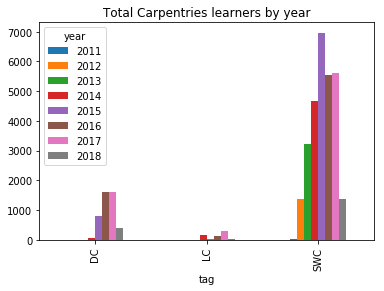

In [20]:
workshops_by_attendance.plot.bar(title="Total Carpentries learners by year")

### Binned attendance total through 2018 Q1

In [21]:
bins = pd.cut(has_attendance_through_2018Q1['attendance'], [1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, np.inf])
has_attendance_through_2018Q1.groupby(bins)['attendance'].agg(['count'])

,count
attendance,
"(1, 10]",74
"(10, 20]",312
"(20, 30]",413
"(30, 40]",290
"(40, 50]",76
"(50, 60]",26
"(60, 70]",11
"(70, 80]",11
"(80, 90]",4


### Binned attendance counts by year.

Shows how many workshops had 1-10 learners, 11-20 learners, etc. Right side is inclusive, left side is not.
How do we show this as a proportion of total, not just as absolute count?
How do we visualize this?  This will help us see if workshops are growing or shrinking in size.

In [22]:
# See https://stackoverflow.com/questions/34317149/pandas-groupby-with-bin-counts
# >>> groups = df.groupby(['username', pd.cut(df.views, bins)])
# >>> groups.size().unstack()

bins = pd.cut(has_attendance_through_2018Q1['attendance'], [1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, np.inf])
binned_attendance_by_year = has_attendance_through_2018Q1.groupby([ bins, 'year'])['attendance'].agg(['count'])

binned_attendance_by_year =  binned_attendance_by_year.unstack()
binned_attendance_by_year['total'] = binned_attendance_by_year.sum(axis=1)

binned_attendance_by_year

# How do we rename 2018 to 2018Q1?  It's not a single index value.

count                                              total
year        2011  2012  2013  2014  2015   2016   2017  2018       
attendance                                                         
(1, 10]      NaN   1.0   2.0   2.0  16.0   23.0   24.0   6.0   74.0
(10, 20]     NaN   3.0  12.0  24.0  50.0   86.0  115.0  22.0  312.0
(20, 30]     1.0   5.0  25.0  49.0  84.0  112.0  113.0  24.0  413.0
(30, 40]     NaN  20.0  37.0  41.0  69.0   55.0   53.0  15.0  290.0
(40, 50]     NaN   6.0  10.0  11.0  29.0    9.0    9.0   2.0   76.0
(50, 60]     NaN   1.0   3.0   4.0   7.0    7.0    4.0   NaN   26.0
(60, 70]     NaN   1.0   1.0   3.0   3.0    1.0    1.0   1.0   11.0
(70, 80]     NaN   1.0   NaN   4.0   4.0    1.0    1.0   NaN   11.0
(80, 90]     NaN   NaN   NaN   3.0   NaN    NaN    NaN   1.0    4.0
(90, 100]    NaN   NaN   1.0   NaN   NaN    NaN    NaN   NaN    1.0
(100, inf]   NaN   NaN   2.0   2.0   NaN    NaN    NaN   NaN    4.0

---
---
---

## Part 3: Workshops

## Workshops by year

This table and chart below show the total number of workshops each year through 2018 Q1. Instructor training events are not included here.

In [23]:
workshops_by_carpentry_year = workshops_through_2018Q1.groupby(['year', 'tag'])['slug'].count().unstack()

workshops_by_carpentry_year['total'] = workshops_by_carpentry_year.sum(axis=1)

workshops_by_carpentry_year



tag,DC,LC,SWC,total
year,,,,
2011,NaN,NaN,1.0,1.0
2012,NaN,NaN,38.0,38.0
2013,NaN,NaN,93.0,93.0
2014,2.0,5.0,137.0,144.0
2015,31.0,1.0,243.0,275.0
2016,72.0,5.0,273.0,350.0
2017,81.0,15.0,257.0,353.0
2018,21.0,1.0,79.0,101.0


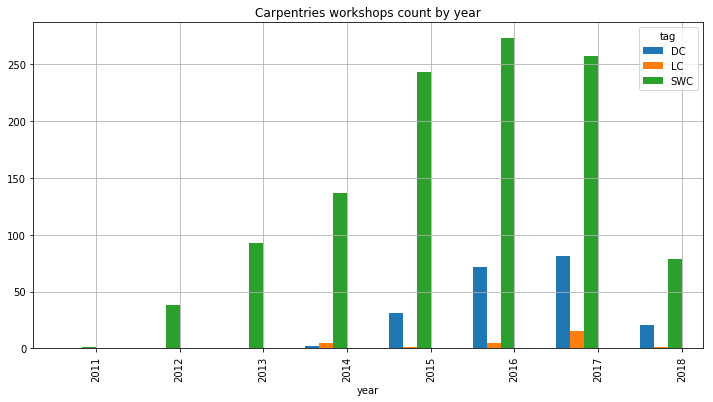

In [27]:
fig = plt.figure(figsize=(12, 6)) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
width = .5
title = "Carpentries workshops count by year"

# df.plot(x="X", y=["A", "B", "C"], kind="bar")
workshops_by_carpentry_year.plot(y = ["DC", "LC", "SWC"], kind='bar', ax=ax, width=width, position=1, title=title)

ax.grid(True)

plt.show()

## Part 4: Badge data

### All badges

The table below shows all Instructor, Trainer, or Maintainer badges issued by the Carpentries. One individual may have multiple badges.

In [28]:
all_badges = pd.read_csv("badges_by_year_agg.csv")
all_badges

,title,count(a.person_id),year
0,Software Carpentry Instructor,34,2012
1,Software Carpentry Instructor,69,2013
2,Software Carpentry Instructor,174,2014
3,Software Carpentry Instructor,197,2015
4,Software Carpentry Instructor,331,2016
5,Software Carpentry Instructor,285,2017
6,Software Carpentry Instructor,121,2018
7,Data Carpentry Instructor,2,2014
8,Data Carpentry Instructor,1,2015
9,Data Carpentry Instructor,344,2016


### Badges by training event

The table below lists all instructor training events run by the Carpentries, with the number attended and the number getting badged, as well as this as a percentage.

In [29]:
badges_by_training_event = pd.read_csv("badges_by_training_event.csv")

# Get all trainings through 2017
trainings_through_2017 = badges_by_training_event[badges_by_training_event['year'] <= 2017]

# Get all trainings for 2018 Q1
trainings_2018Q1 = badges_by_training_event[(badges_by_training_event['year'] == 2018) & (badges_by_training_event['month'] <= 3)]

# Combine the above two data frames
trainings_through_2018Q1 = pd.concat([trainings_through_2017, trainings_2018Q1])

trainings_through_2018Q1['pct_completion'] = trainings_through_2018Q1['count_badged'] / trainings_through_2018Q1['attendance'] * 100
trainings_through_2018Q1 = trainings_through_2018Q1.round({'pct_completion':1})
trainings_through_2018Q1


,count_badged,slug,attendance,country,month,year,day,pct_completion
0,17,2012-08-26-ttt-online,20,W3,8,2012,26,85.0
1,19,2012-10-11-ttt-online,25,W3,10,2012,11,76.0
2,5,2013-01-06-ttt-online,12,W3,1,2013,6,41.7
3,18,2013-03-12-ttt-online,27,W3,3,2013,12,66.7
4,18,2013-05-12-ttt-online,45,W3,5,2013,12,40.0
5,24,2013-08-12-ttt-online,41,W3,8,2013,12,58.5
6,22,2013-09-30-ttt-online,57,W3,9,2013,30,38.6
7,25,2014-01-16-ttt-online,67,W3,1,2014,16,37.3
8,3,2014-04-14-ttt-pycon,34,W3,4,2014,14,8.8
9,24,2014-04-24-ttt-online,58,W3,4,2014,24,41.4


### Completion rates by training event

In [31]:
bins = pd.cut(trainings_through_2018Q1['pct_completion'], [0, 25, 50, 75, 99, 100])
binned_badges_by_year = trainings_through_2018Q1.groupby([ bins, 'year'])['pct_completion'].agg(['count'])

binned_badges_by_year =  binned_badges_by_year.unstack()
binned_badges_by_year['total'] = binned_badges_by_year.sum(axis=1)

binned_badges_by_year

# Need to add total row

count                                 total
year            2012 2013 2014 2015  2016  2017 2018      
pct_completion                                            
(0, 25]          NaN  NaN  2.0  1.0   6.0   3.0  6.0  18.0
(25, 50]         NaN  3.0  5.0  8.0  18.0  18.0  2.0  54.0
(50, 75]         NaN  2.0  3.0  8.0   8.0  22.0  3.0  46.0
(75, 99]         2.0  NaN  NaN  3.0   3.0   3.0  NaN  11.0
(99, 100]        NaN  NaN  NaN  1.0   NaN   1.0  NaN   2.0

### Badges by country, 2017

This shows what country the badged person is in, not where the training took place.  The year is when the badge was awarded, not when the training took place.  Would like to plot years side by side to show growth in each country. An individual can have multiple badges.   

In [49]:
# Source query here needs work. It is counting badged individuals, not badges issued.

badges_by_country_by_year_awarded = pd.read_csv("badges_by_country_by_year.csv")
badges_by_country_by_year_awarded = badges_by_country_by_year_awarded.groupby(['country', 'year_awarded'])['count(id)'].sum().unstack()
badges_by_country_by_year_awarded = badges_by_country_by_year_awarded.fillna(0)
badges_by_country_by_year_awarded.rename(columns={2018: '2018Q1'}, inplace=True)
badges_by_country_by_year_awarded
badges_by_country_by_year_awarded['total'] = badges_by_country_by_year_awarded.sum(axis=1)
badges_by_country_by_year_awarded

year_awarded,2012,2013,2014,2015,2016,2017,2018Q1,total
country,,,,,,,,
AE,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
AU,0.0,5.0,5.0,33.0,30.0,24.0,6.0,103.0
BE,0.0,0.0,0.0,1.0,3.0,1.0,0.0,5.0
BJ,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
BR,0.0,0.0,0.0,1.0,4.0,2.0,0.0,7.0
CA,7.0,6.0,27.0,20.0,43.0,10.0,2.0,115.0
CH,0.0,1.0,1.0,0.0,12.0,3.0,0.0,17.0
CL,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
CN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [62]:
badges2017 = badges_by_country_by_year_awarded[[2017]]
badges2017 = badges2017[badges2017[2017] != 0]
badges2017

year_awarded,2017
country,
AU,24.0
BE,1.0
BR,2.0
CA,10.0
CH,3.0
DE,7.0
DK,3.0
ES,1.0
ET,3.0


### Instructor badges by country, 2018

This shows what country the badged person is in, not where the training took place.  The year is when the badge was awarded, not when the training took place.  Would like to plot years side by side to show growth in each country. 

In [63]:
badges_by_country_by_year_awarded2018 = badges_by_country_by_year_awarded[badges_by_country_by_year_awarded['year_awarded'] == 2018]
badges_by_country_by_year_awarded2018.plot.bar(x='country', y='count(id)', title="Badges by country, 2018")
badges_by_country_by_year_awarded2018

KeyError: 'year_awarded'

In [ ]:
# Instructor training events
# Count number who got badged by event

# https://data.softwarecarpentry.org/queries/80/source#table
# https://data.softwarecarpentry.org/queries/83/source

# Online events - not country specific

# Would like to break this out by country as well
# Try https://data.softwarecarpentry.org/queries/61